In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pypsa
import yaml
import pandas as pd

import model

In [2]:
# n = model.create_model()
n = pypsa.Network("models/LYR_2011_2019.nc")

/home/koen/.local/opt/miniconda3/envs/pypsa-longyearbyen/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/koen/.local/opt/miniconda3/envs/pypsa-longyearbyen/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network LYR_2011_2019.nc has buses, generators, links, loads, storage_units, stores


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


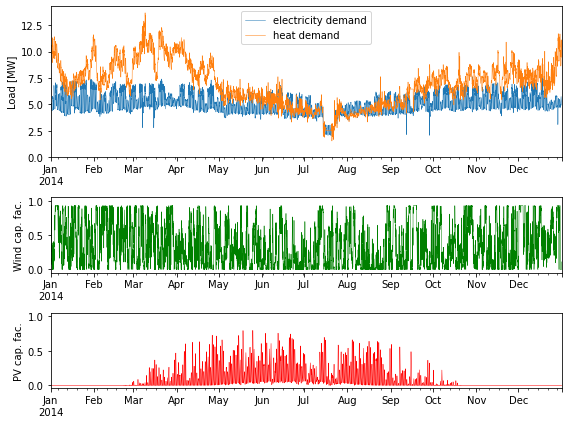

In [3]:
fix, axs = plt.subplots(3, figsize=(8, 6), gridspec_kw={'height_ratios': [2, 1, 1]})
n.loads_t["p_set"].loc["2014", "electricity demand"].plot(lw=0.5, ax=axs[0])
n.loads_t["p_set"].loc["2014", "heat demand"].plot(lw=0.5, ax=axs[0])
n.generators_t["p_max_pu"].loc["2014", "LH TUGE50"].plot(color='green', lw=0.5, ax=axs[1])
n.generators_t["p_max_pu"].loc["2014", "PV"].plot(color='red', lw=0.5, ax=axs[2])
axs[0].set_ylabel("Load [MW]")
axs[0].set_xlabel("")
axs[0].set_ylim(ymin=0)
axs[0].legend()
axs[1].set_ylabel("Wind cap. fac.")
axs[1].set_xlabel("")
axs[1].set_ylim(ymax=1.05)
axs[2].set_ylabel("PV cap. fac.")
axs[2].set_xlabel("")
axs[2].set_ylim(ymax=1.05)
plt.tight_layout()
plt.savefig("figures/demand.pdf")

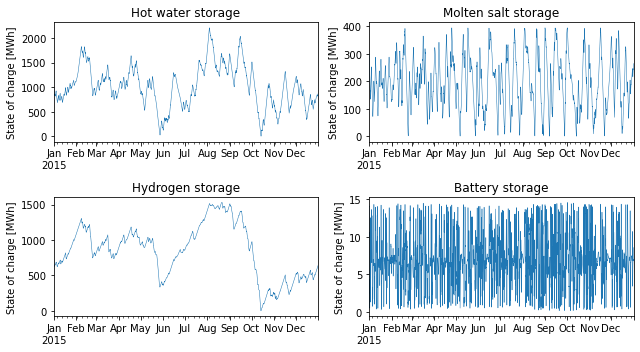

In [4]:
period = "2015"

fig, axs = plt.subplots(2, 2, figsize=(9, 5))

n.stores_t["e"].loc[period, "hydrogen storage"].plot(ax=axs[1][0], lw=0.5)
axs[1][0].set_title("Hydrogen storage")

n.stores_t["e"].loc[period, "hot water storage"].plot(ax=axs[0][0], lw=0.5)
axs[0][0].set_title("Hot water storage")

n.stores_t["e"].loc[period, "molten salt storage"].plot(ax=axs[0][1], lw=0.5)
axs[0][1].set_title("Molten salt storage")

n.storage_units_t["state_of_charge"].loc[period, "batteries"].plot(ax=axs[1][1], lw=0.5)
axs[1][1].set_title("Battery storage")

for ax in axs.flatten():
    ax.set_ylabel("State of charge [MWh]")
    ax.set_xlabel("")
    
plt.tight_layout()
plt.savefig("figures/states_of_charge.pdf")

In [5]:
# Total installed wind capacity
n.generators["p_nom_opt"].iloc[:15].sum()

38.59247299361037

In [6]:
# Total installed PV capacity
n.generators["p_nom_opt"]["PV"]

2.1295892092238753

In [7]:
# Battery capacity:
n.storage_units["p_nom_opt"] * 6

name
batteries    14.747719
Name: p_nom_opt, dtype: float64

In [8]:
# Chargers, etc.:
n.links["p_nom_opt"]

name
electrolysis                       2.111338
fuel cell                          7.606240
heat pump to heat                  1.577878
heat pump to hot water storage     3.257899
hot water heat exchanger out       8.153111
hot rocks charger                  0.003600
hot rocks heat exchanger out       0.001107
hot rocks thermal generator        0.000643
molten salt charger               11.867599
molten salt heat exchanger out     0.781531
molten salt thermal generator      3.899021
Name: p_nom_opt, dtype: float64